In [1]:
# Importing packages

import time

start_time = time.time()

try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    import tensorflow as tf
    from sklearn.metrics import confusion_matrix, classification_report
    from datasets import Dataset, Image, ClassLabel
    from tensorflow.keras.models import Sequential
    from tensorflow.keras import layers, models
    import os
    import cv2

    print("All packages imported successfully.")
except ImportError as e:
    print(f"Error importing package: {e}")

end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken for importing packages: {time_taken:.4f} seconds")

e:\adgama_internship\env_ada\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All packages imported successfully.
Time taken for importing packages: 20.7774 seconds


In [2]:
# Define a function to read images and classify them into training and test sets.

def read_and_classify_image(dataset_dir):
    train_img = []
    test_img = []

    # iterating through directories in the dataset directory
    for data in os.listdir(dataset_dir):
        if data in ['train', 'test']:
            data_path = os.path.join(dataset_dir, data)

            # iterating through the sub- directories (fake, real)
            for class_dir in os.listdir(data_path):
                class_path = os.path.join(data_path, class_dir)
                label = class_dir

                # iterating through the images files in fake and real folders
                for image_name in os.listdir(class_path):
                    if image_name.endswith(".jpg") or image_name.endswith(".png"):
                        image_path = os.path.join(class_path, image_name)

                        if data == "train":
                            train_img.append((image_path, label))
                        elif data == "test":
                            test_img.append((image_path, label))
                        else:
                            print("Error")

    # return list of train and test images
    return train_img, test_img

In [3]:
# Return the lists of train and test images
base_dir = "E:/adgama_internship/CIFAKE/data"
train_img, test_img = read_and_classify_image(base_dir)

In [4]:
# convert the lists of images to dataframe
train_image_df = pd.DataFrame(train_img, columns=['image_path', 'label'])
test_image_df = pd.DataFrame(test_img, columns=['image_path', 'label'])

In [5]:
# printing the first train 5 values
print("---Train DataFrame---")
train_image_df.head()

---Train DataFrame---


,image_path,label
0,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
1,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
2,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
3,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
4,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE


In [6]:
# printing the first train 5 values
print("---Train DataFrame---")
train_image_df.head()

---Train DataFrame---


,image_path,label
0,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
1,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
2,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
3,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE
4,E:/adgama_internship/CIFAKE/data\train\FAKE\10...,FAKE


In [7]:
# printing the first 5 test values
print("---Test DataFrame---")
test_image_df.head()

---Test DataFrame---


,image_path,label
0,E:/adgama_internship/CIFAKE/data\test\FAKE\0 (...,FAKE
1,E:/adgama_internship/CIFAKE/data\test\FAKE\0 (...,FAKE
2,E:/adgama_internship/CIFAKE/data\test\FAKE\0 (...,FAKE
3,E:/adgama_internship/CIFAKE/data\test\FAKE\0 (...,FAKE
4,E:/adgama_internship/CIFAKE/data\test\FAKE\0 (...,FAKE


In [8]:
# printing the last 5 test values
print("---Test DataFrame---")
test_image_df.tail()

---Test DataFrame---


,image_path,label
19995,E:/adgama_internship/CIFAKE/data\test\REAL\099...,REAL
19996,E:/adgama_internship/CIFAKE/data\test\REAL\099...,REAL
19997,E:/adgama_internship/CIFAKE/data\test\REAL\099...,REAL
19998,E:/adgama_internship/CIFAKE/data\test\REAL\099...,REAL
19999,E:/adgama_internship/CIFAKE/data\test\REAL\099...,REAL


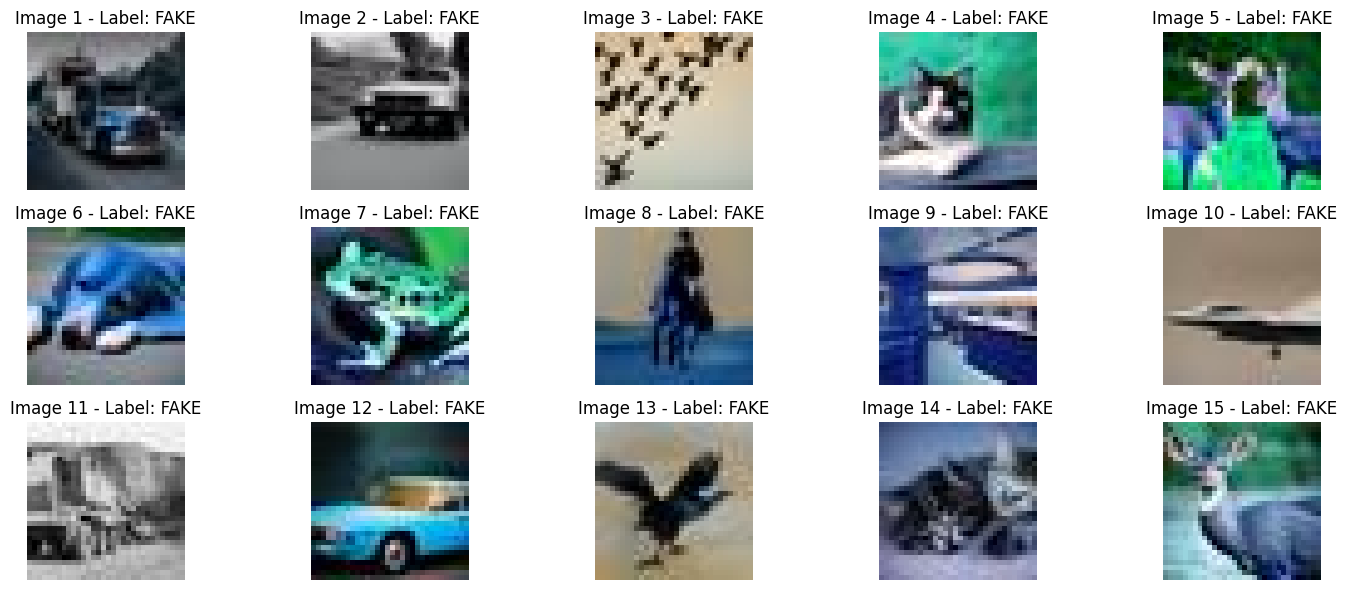

In [9]:
# displaying the first 15 images

fig, axs = plt.subplots(3, 5, figsize=(15, 6))

for i, ax in enumerate(axs.flatten()):
    image_path = train_image_df.loc[i, 'image_path']
    label = train_image_df.loc[i, 'label']

    # Read image using OpenCV
    image = cv2.imread(image_path)

    # Display the image using Matplotlib
    ax.imshow(image)
    ax.set_title(f'Image {i+1} - Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

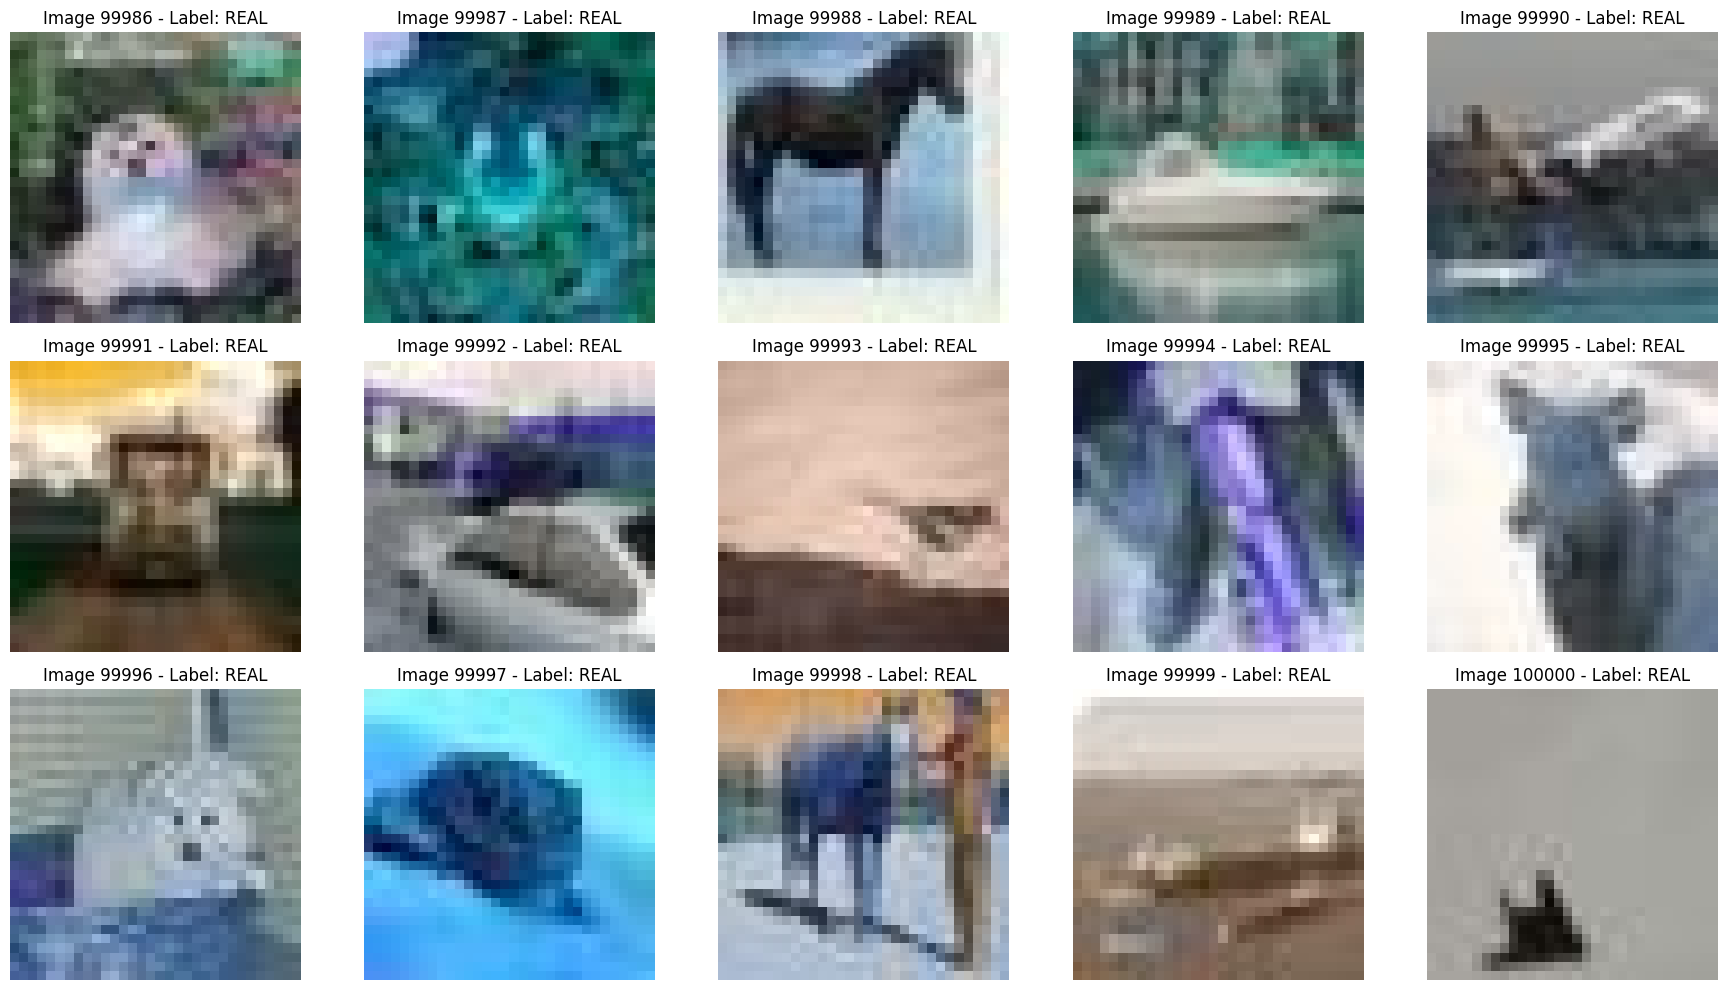

In [10]:
# display the last 15 images

fig, axs = plt.subplots(3, 5, figsize=(18, 10))

last_15_indices = train_image_df.index[-15:]

for i, ax in enumerate(axs.flatten()):
    # get the index of the corresponding row
    index = last_15_indices[i]

    # get image path and label
    image_path = train_image_df.loc[index, 'image_path']
    label = train_image_df.loc[index, 'label']

    # read image using OpenCV
    image = cv2.imread(image_path)

    # display the image using Matplotlib
    ax.imshow(image)
    ax.set_title(f'Image {index+1} - Label: {label}')
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [11]:
train_dir = os.path.join(base_dir, 'train')
fake_dir = os.path.join(train_dir, 'fake')
real_dir = os.path.join(train_dir, 'real')

In [12]:
# create a function to detect outliers and inconsistencies in the dataset
min_height_threshold = 16  # taking half the value of the originial height
min_width_threshold = 16  # taking half the value of the originial width


def detect_outlier_inconsistencies(dire):
    outlier_image = []       # creating a empty list to store outliers info
    inconsistent_image = []  # creating a empty list to store inconsistent info

    # iterate through the images
    for root, dirs, files in os.walk(dire):
        for file in files:
            image_path = os.path.join(root, file)
            # using try-except
            try:
                image = cv2.imread(image_path)             # read the image
                if image is None:          # check if image is readable
                    # considering it as outlier if image could not be read
                    outlier_image.append(image_path)
                elif image.shape[0] < min_height_threshold or image.shape[1] < min_width_threshold:
                    # considering the image dimensional as small to add in outliers
                    outlier_image.append(image_path)
                # checking whether the image has three channels that are RGB or not
                elif image.shape[2] != 3:
                    inconsistent_image.append(image_path)
            except Expection as e:     # adding except to catch the error
                print(f"Error processing image {image_path}: {str(e)}")

    return outlier_image, inconsistent_image

In [13]:
# detect the outliers and inconsistencies in the fake images folder
fake_outliers, fake_inconsistencies = detect_outlier_inconsistencies(fake_dir)

In [14]:
# print fake outliers and inconsistencies

print("Fake Outliers:", len(fake_outliers))
print("Fake Inconsistencies:", len(fake_inconsistencies))

Fake Outliers: 0
Fake Inconsistencies: 0


In [15]:
# detect the outliers and inconsistencies in the real images folder
real_outliers, real_inconsistencies = detect_outlier_inconsistencies(real_dir)

In [16]:
# print real outliers and inconsistencies

print("Real Outliers:", len(real_outliers))
print("Real Inconsistencies:", len(real_inconsistencies))

Real Outliers: 0
Real Inconsistencies: 0


In [17]:
dataset_dir = "E:/adgama_internship/CIFAKE/data"
print("Loading dataset from: " + dataset_dir)

Loading dataset from: E:/adgama_internship/CIFAKE/data


In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [47]:
w, h = 32, 32
batch_size = 32

train_data_gen = ImageDataGenerator(
    rescale=1.0/255
)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [48]:
train_Dataset = train_data_gen.flow_from_directory(
    dataset_dir + "/train",
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 100000 images belonging to 2 classes.


In [49]:
test_Dataset = test_data_gen.flow_from_directory(
    dataset_dir + "/test",
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.


In [50]:
test_Dataset.class_indices

{'FAKE': 0, 'REAL': 1}

In [51]:
train_Dataset.image_shape

(32, 32, 3)

In [56]:
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(w, h, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
# Output layer with 1 neuron (binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

e:\adgama_internship\env_ada\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [57]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,528,513 (9.65 MB)

 Trainable params: 2,528,513 (9.65 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Specify the filepath where you want to save the weights
weight_path = 'cnn.weights.h5'

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=weight_path,
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    monitor='val_accuracy'
)

In [66]:
history = model.fit(train_Dataset,
                    epochs=5,
                    validation_data=test_Dataset,
                    callbacks=[model_checkpoint]
                    )

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 406s 130ms/step - accuracy: 0.9463 - loss: 0.1388 - val_accuracy: 0.9255 - val_loss: 0.1923
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 488s 156ms/step - accuracy: 0.9534 - loss: 0.1222 - val_accuracy: 0.9324 - val_loss: 0.1788
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 632s 202ms/step - accuracy: 0.9567 - loss: 0.1101 - val_accuracy: 0.9330 - val_loss: 0.1879
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 647s 207ms/step - accuracy: 0.9622 - loss: 0.0972 - val_accuracy: 0.9280 - val_loss: 0.2224
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 631s 202ms/step - accuracy: 0.9669 - loss: 0.0858 - val_accuracy: 0.9319 - val_loss: 0.2094


In [67]:
# load best weights to model
model.load_weights(weight_path)

# make prediction
predictions = model.predict(test_Dataset)

625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step


In [68]:
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10000
           1       0.94      0.93      0.93     10000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



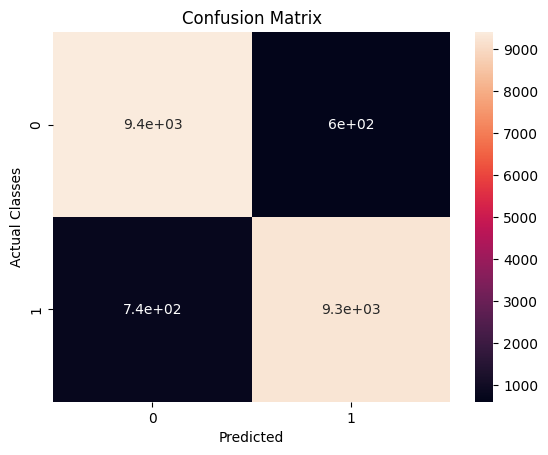

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have true labels (ground truth)
true_labels = test_Dataset.classes

# Generate a confusion matrix
sns.heatmap(confusion_matrix(true_labels, binary_predictions), annot=True)

# Print classification report
print(classification_report(true_labels, binary_predictions))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Classes')
plt.show()

In [1]:
import numpy as np
import tensorflow as tf

# Load and preprocess the new image you want to test
# Change 'path_to_your_image.jpg' to the path of your new image
new_image_path = 'b.jpg'
new_image = tf.keras.preprocessing.image.load_img(
    new_image_path, target_size=(w, h))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(
    new_image_array, axis=0)  # Add batch dimension
new_image_array = new_image_array / 255.0  # Normalize pixel values

# Use the model to make predictions
predictions = model.predict(new_image_array)

# Convert predictions to binary format (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Display the predictions
if binary_predictions[0][0] == 0:
    print("The image is classified as fake.")
else:
    print("The image is classified as real.")

NameError: name 'w' is not defined